In [3]:
!pip install missingno



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [5]:
training_data = pd.read_csv('train.csv')
training_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
training_data.shape

(1460, 81)

In [7]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
training_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
training_data.drop(training_data.isnull().sum()[training_data.isnull().sum()/len(training_data) > 0.15].index, axis = 1, inplace = True)

<Axes: >

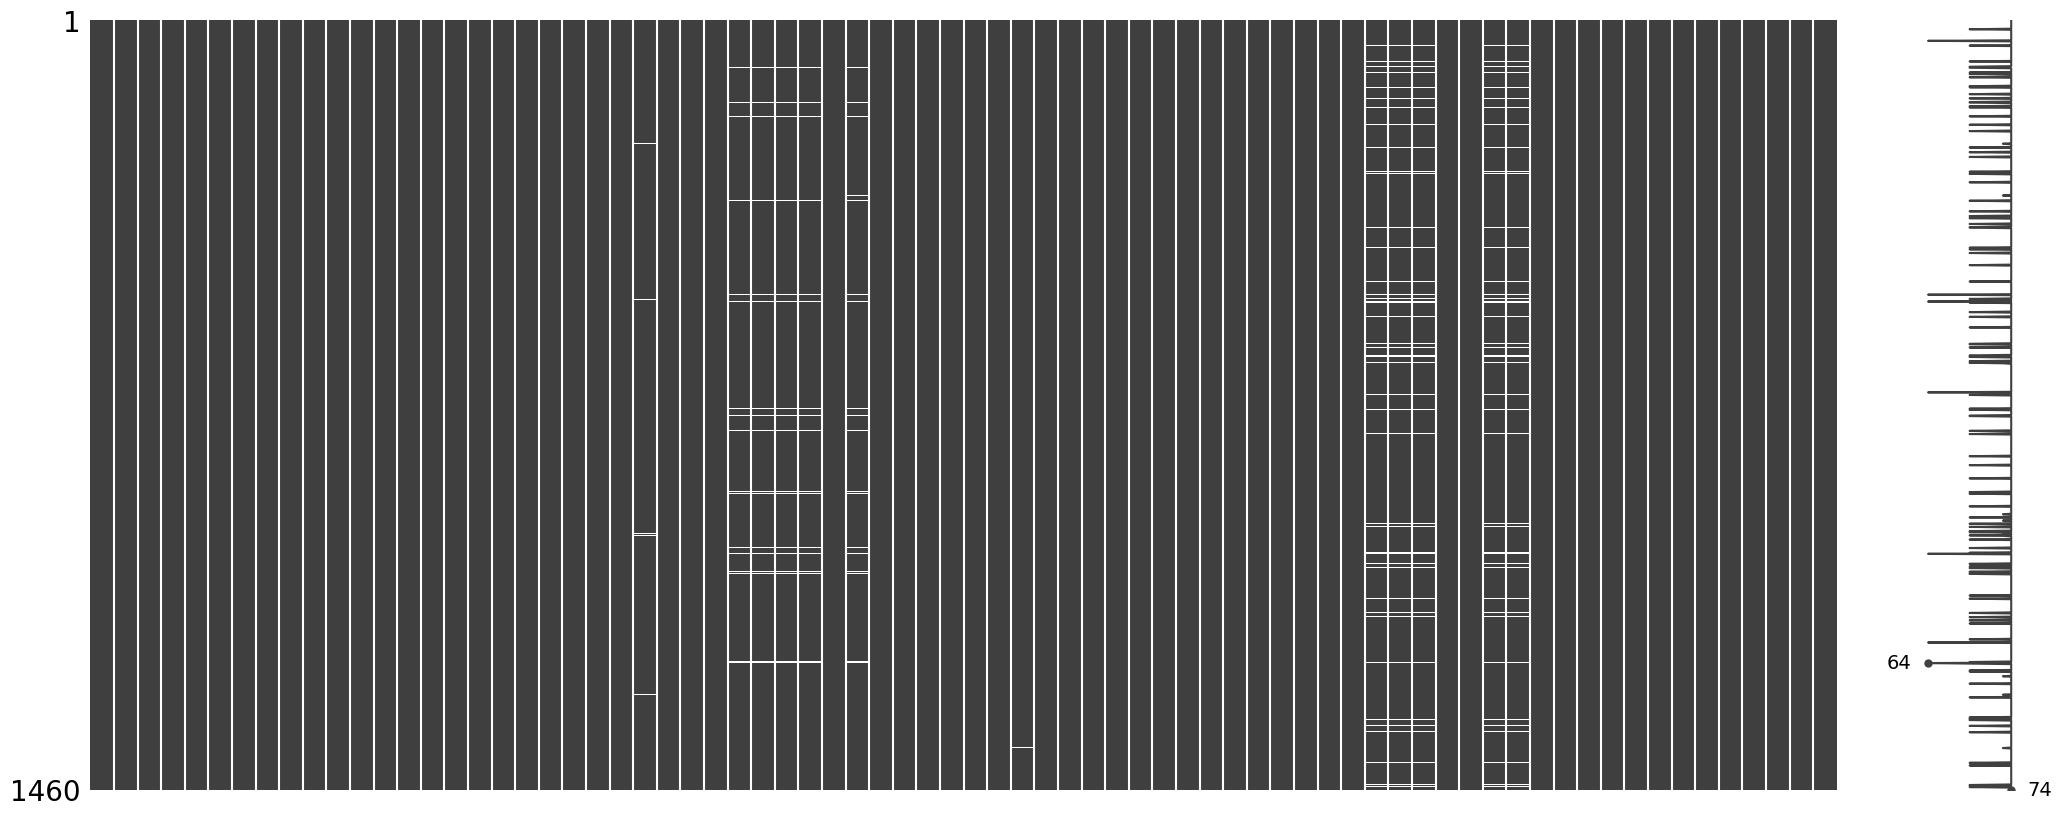

In [10]:
msno.matrix(training_data)

Text(0.5, 1.0, 'Sale Price Histogram')

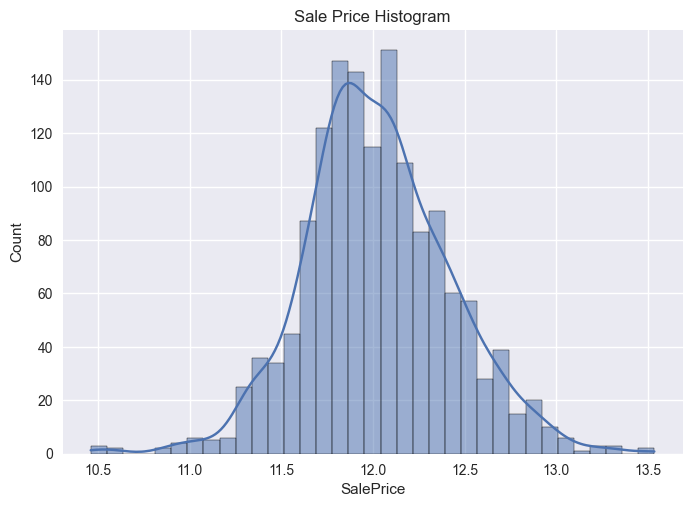

In [11]:
plt.style.use('seaborn-v0_8')

sns.histplot('SalePrice']), kde=True)
plt.title('Sale Price Histogram')

Text(0.5, 1.0, 'Sale Price Histogram')

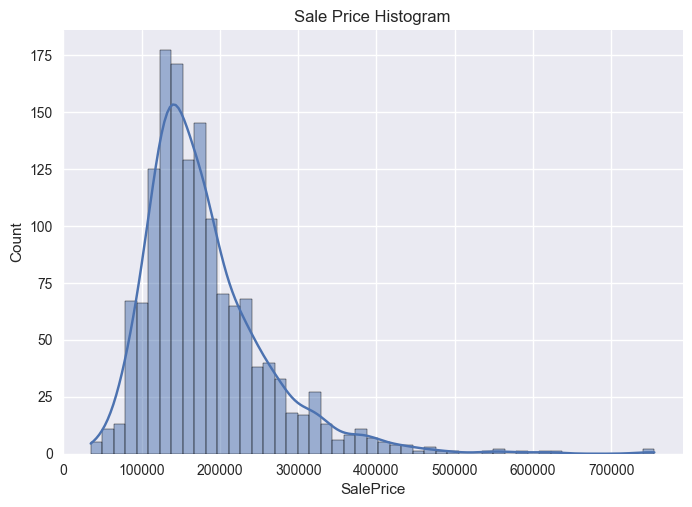

In [12]:
plt.style.use('seaborn-v0_8')
sns.histplot(training_data['SalePrice'], kde=True)
plt.title('Sale Price Histogram')

Text(0.5, 1.0, 'Box Plot')

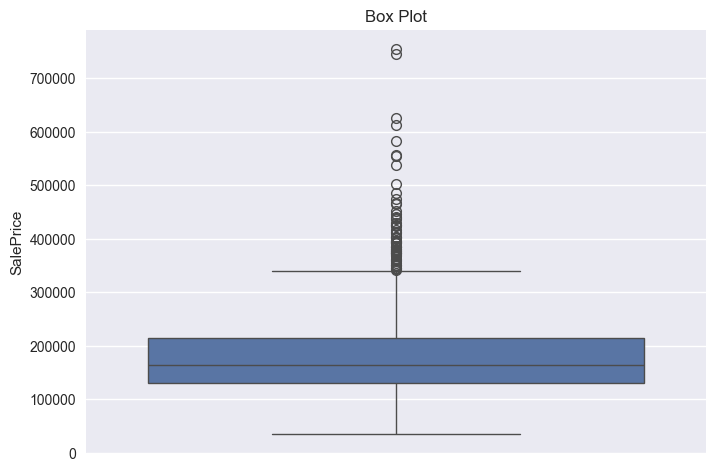

In [13]:
plt.style.use('seaborn-v0_8')
sns.boxplot(training_data['SalePrice'])
plt.title('Box Plot')

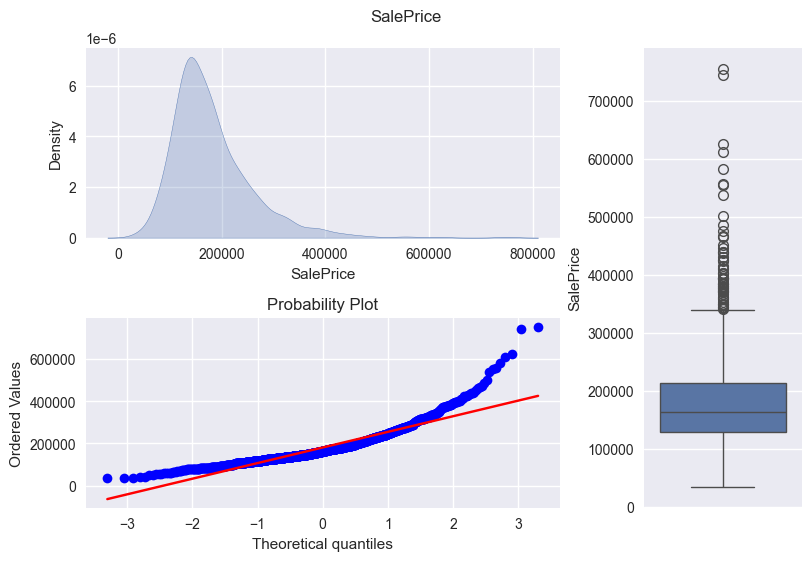

In [14]:
from matplotlib.gridspec import GridSpec
import  scipy.stats as stats

fig = plt.figure(layout="constrained")

gs = GridSpec(2, 4, figure=fig)
ax1 = fig.add_subplot(gs[0:-1, :-1])
ax2 = fig.add_subplot(gs[1, :-1])
ax3 = fig.add_subplot(gs[:, -1])

fig.suptitle('SalePrice')
sns.kdeplot(training_data['SalePrice'], fill = True, ax = ax1)
stats.probplot(training_data['SalePrice'], dist='norm', plot=ax2)
sns.boxplot(training_data['SalePrice'], ax=ax3)

plt.show()

## Target is not gaussian distribution and has outliers

1. We need to see the co-relation btw the target and the features
2. We have both num and categorical values
3. Segregate the num and cat values
4. We need to understand the co-relation btw features too, to avoid repitions

In [15]:
numerical = training_data.select_dtypes(exclude='object')
categorical = training_data.select_dtypes(include='object')

In [16]:
try:
    assert len(training_data.columns) == len(numerical.columns) + len(categorical.columns)

except AssertionError:
    print('Columns are not matching')

In [17]:
y = numerical['SalePrice']
numerical.drop('SalePrice', axis=1, inplace=True)

In [18]:
numerical.head(2)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,2,20,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007


In [19]:
categorical.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [20]:
num_cat = numerical[numerical.nunique()[numerical.nunique() < 50].index]
num_num = numerical[numerical.nunique()[numerical.nunique() >= 50].index]
print(num_cat.columns)

num_num.drop('Id', axis=1, inplace=True)
print(num_num.columns)

Index(['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch',
       'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')


C:\Users\Harshith\AppData\Local\Temp\ipykernel_11664\1570622216.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_num.drop('Id', axis=1, inplace=True)


In [21]:
year_cols = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
num_num_years = num_num[year_cols]
num_num_wo_years = num_num.drop(year_cols, axis=1)

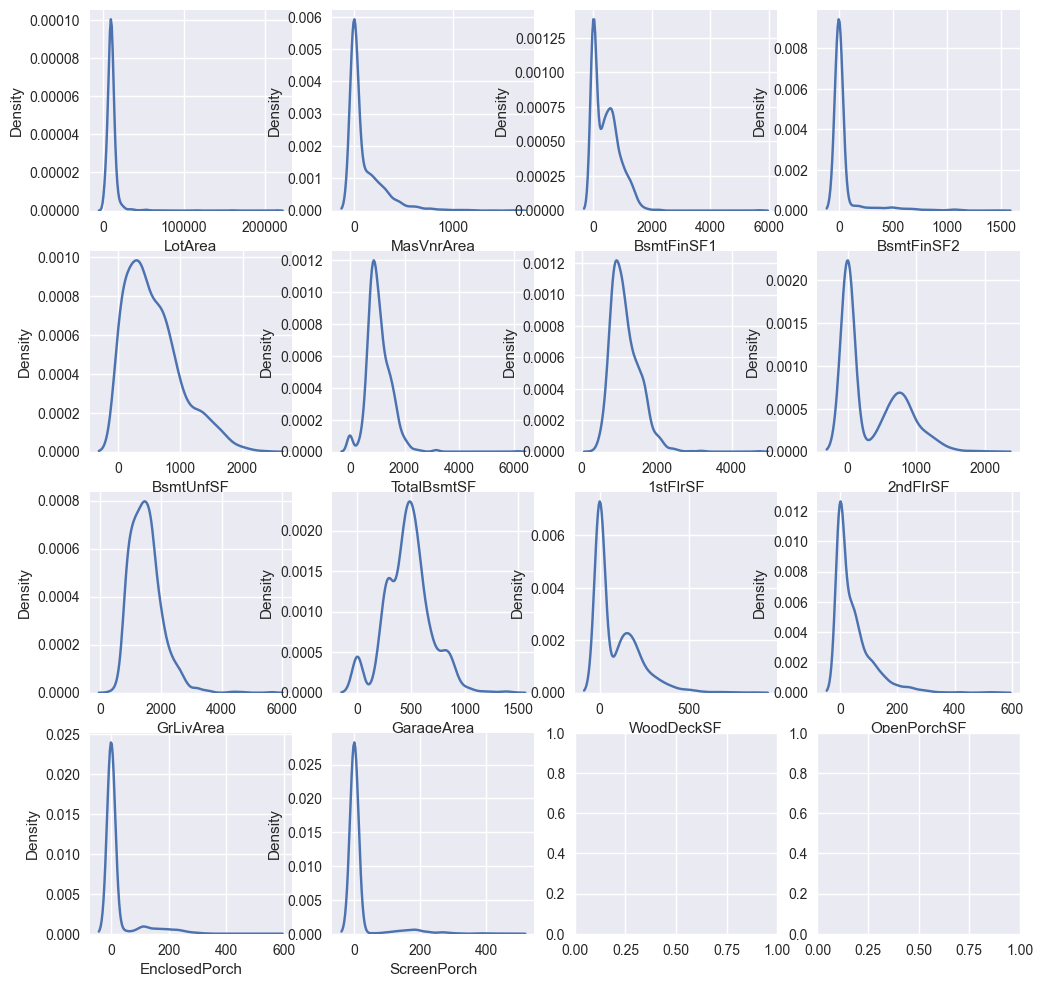

In [22]:
fig, axes = plt.subplots( 4, 4, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    sns.kdeplot(num_num_wo_years[cols], ax = ax)

<Axes: >

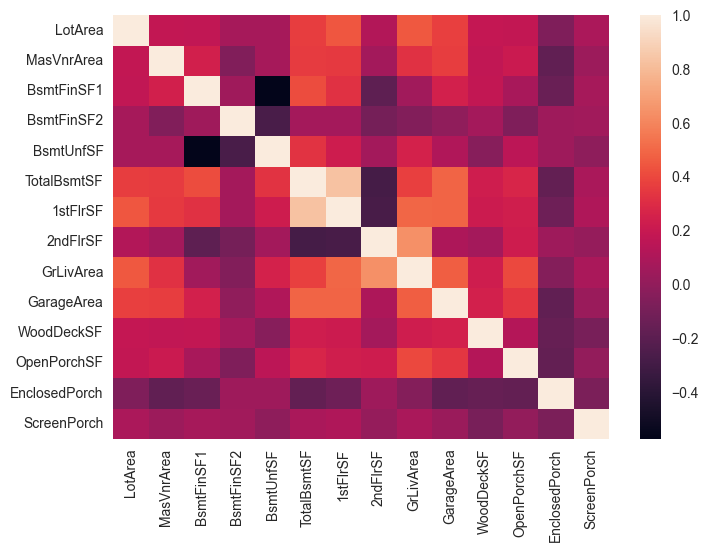

In [23]:
sns.heatmap(num_num_wo_years.corr(method = 'spearman'))

In [24]:
num_num_drop_corr = ['BsmtFinSF1', '1stFlrSF']
num_num_wo_years.drop(num_num_drop_corr, axis = 1, inplace = True)

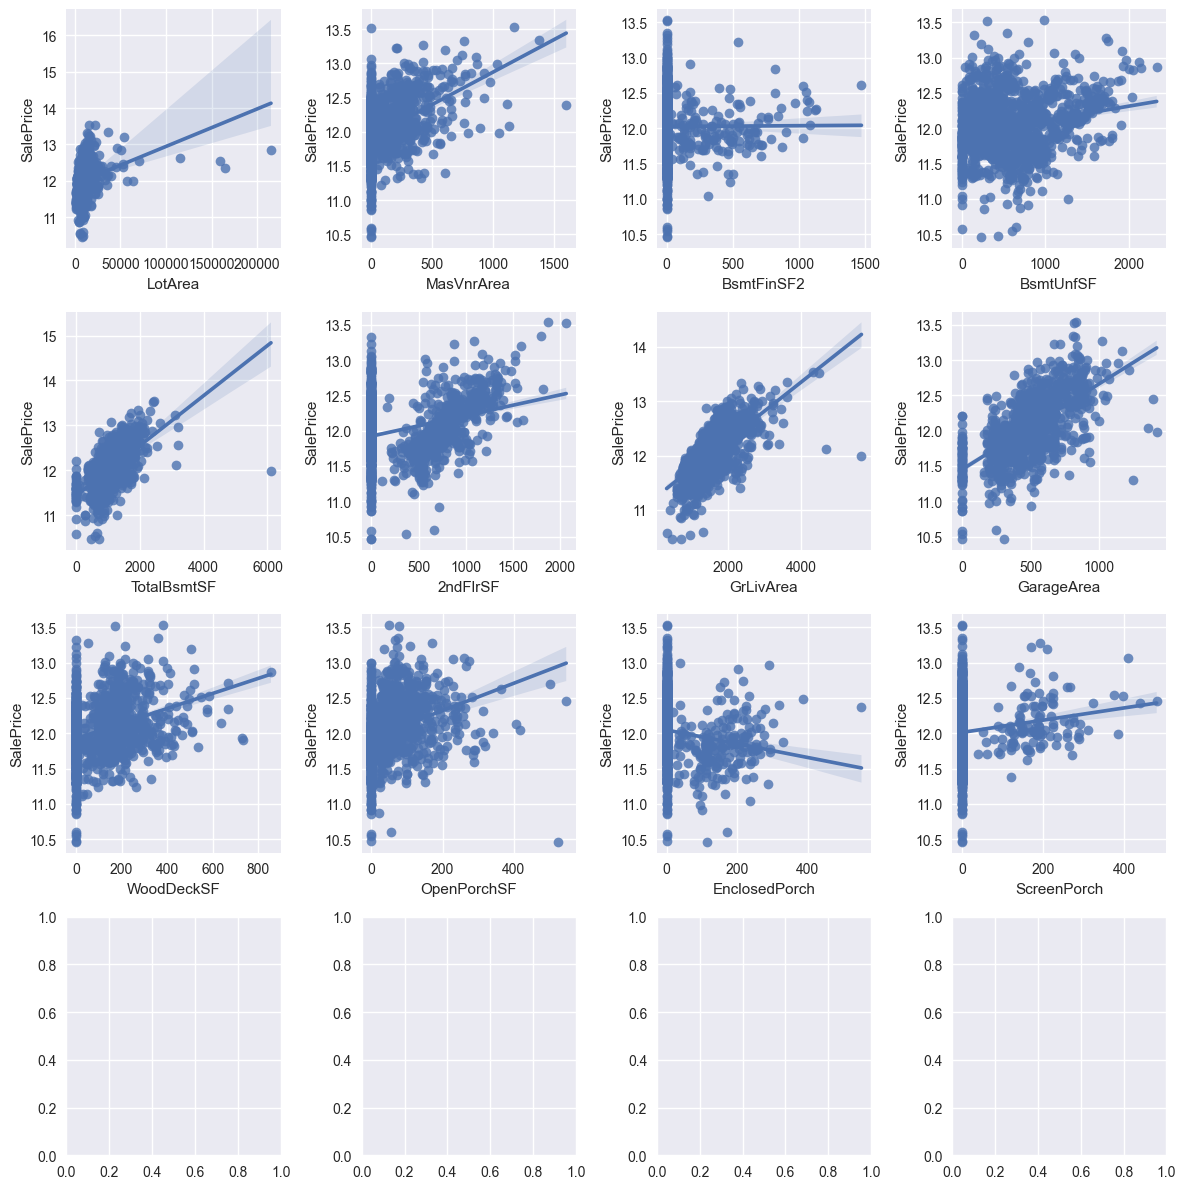

In [25]:

fig, axes = plt.subplots( 4, 4, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    sns.regplot(x = num_num_wo_years[cols] , y = np.log1p(y),  ax = ax)
plt.tight_layout()

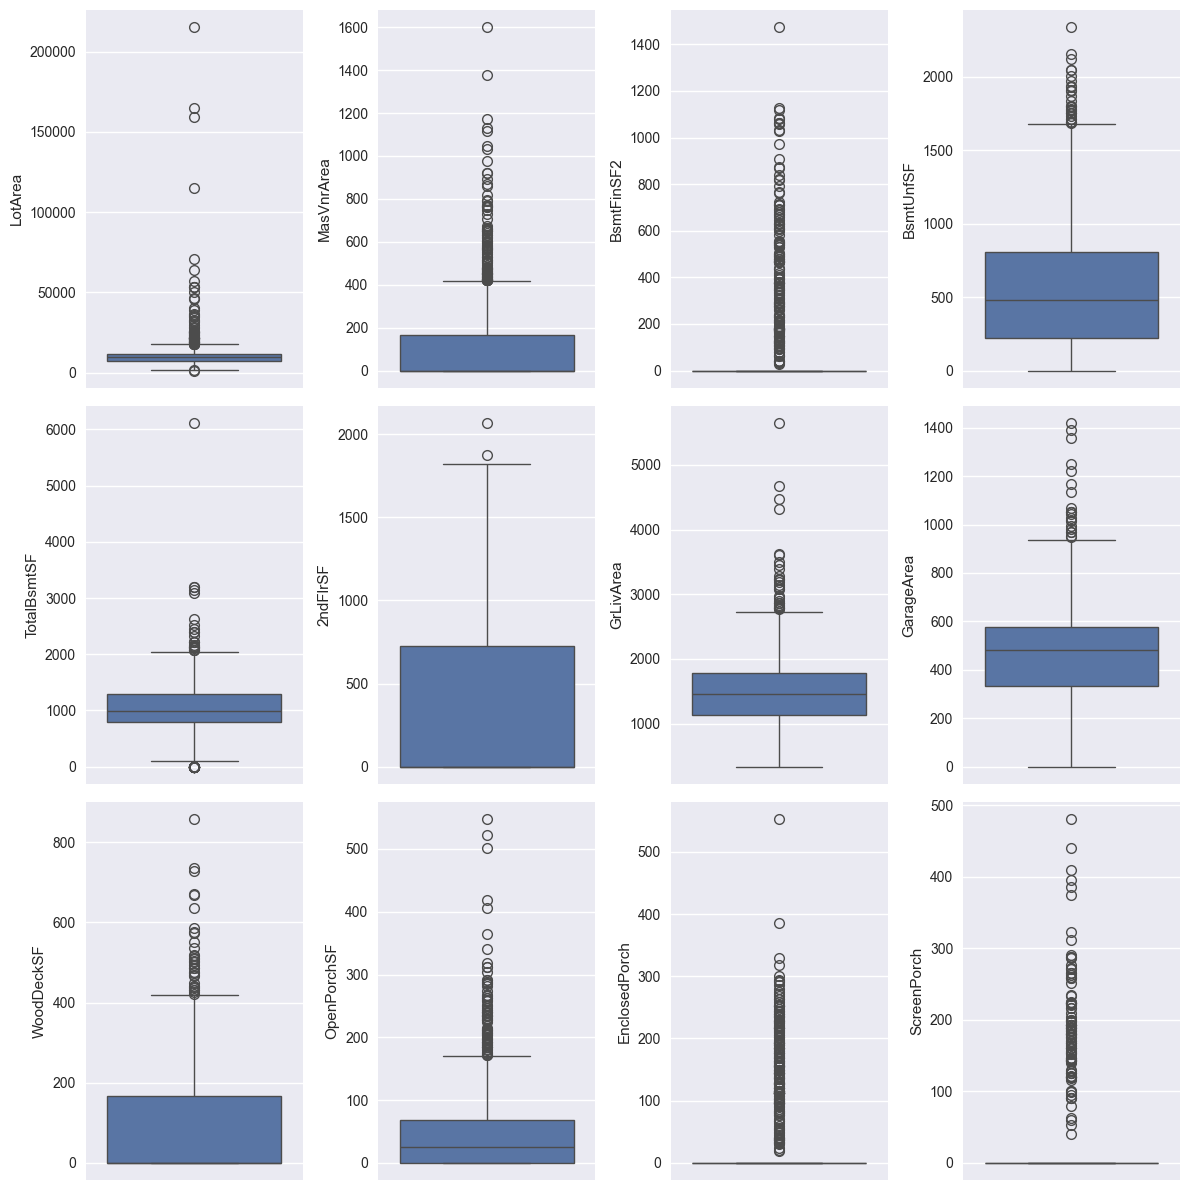

In [26]:
fig, axes = plt.subplots( 3, 4, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    sns.boxplot(num_num_wo_years[cols], ax = ax)
plt.tight_layout()

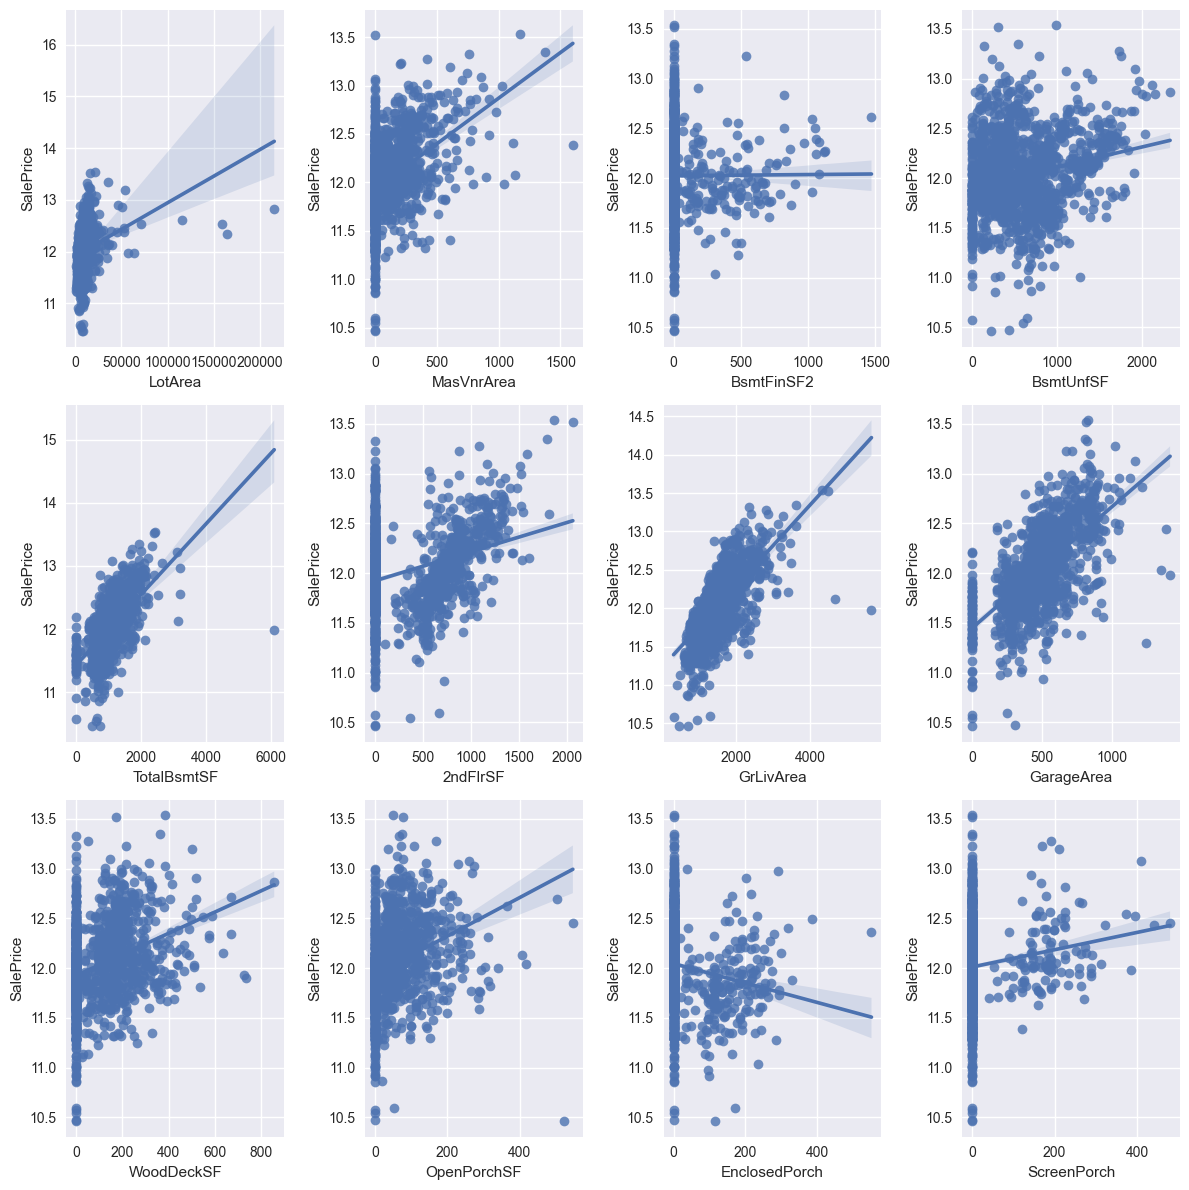

In [66]:
temp_data = pd.concat([num_num_wo_years, y], axis = 1)

fig, axes = plt.subplots( 3, 4, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    temp = temp_data[[cols, 'SalePrice']]
    sns.regplot(x = temp[cols] , y = np.log1p(temp['SalePrice']),  ax = ax)
plt.tight_layout()

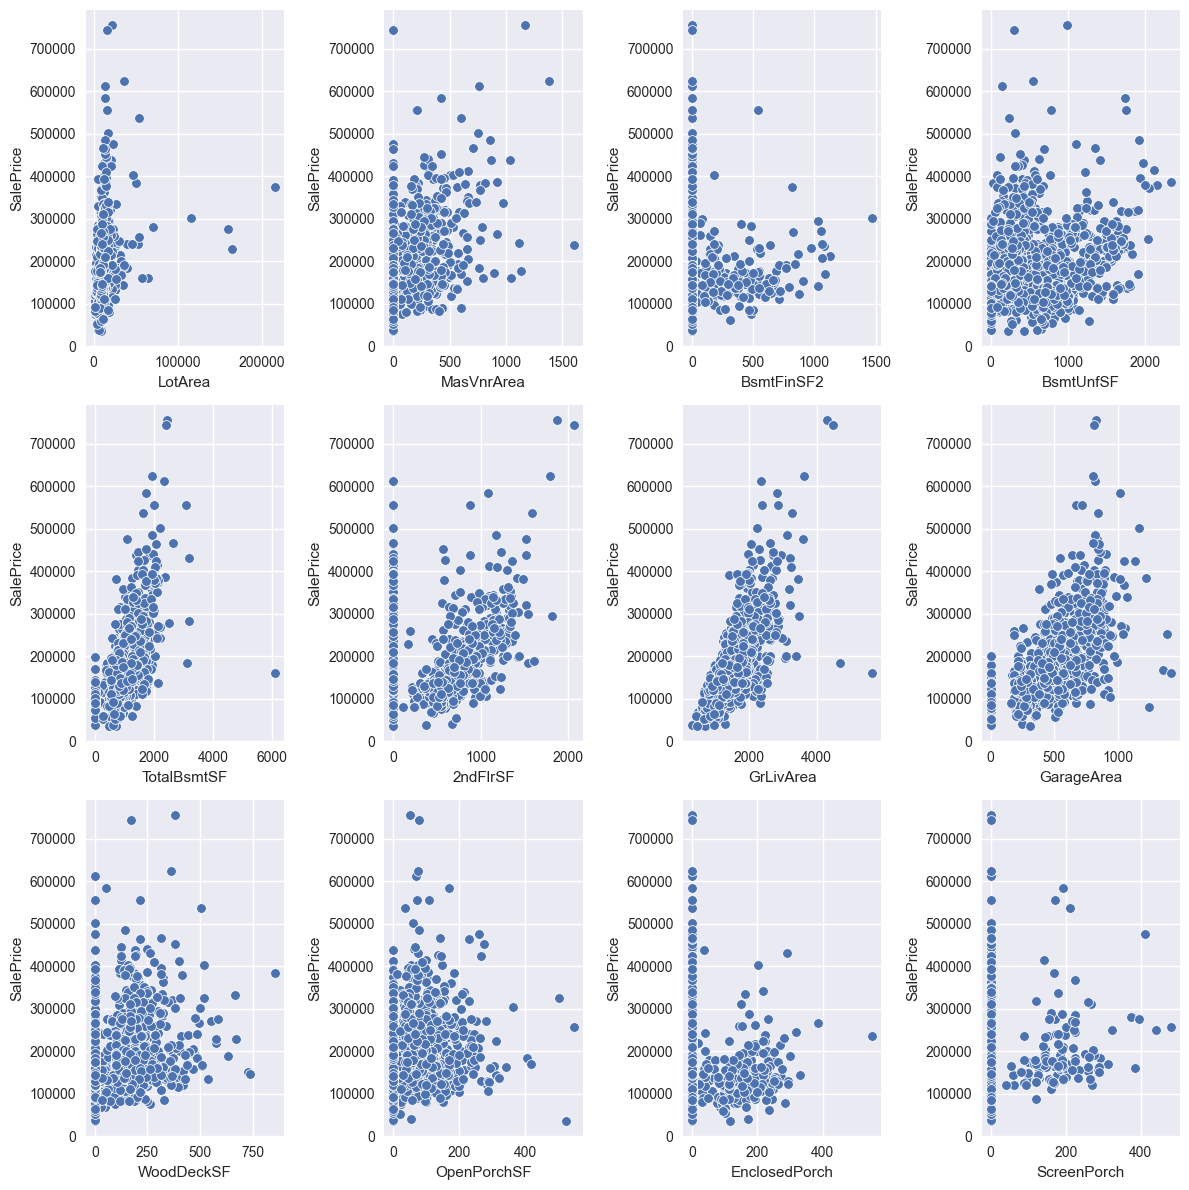

In [67]:
temp_data = pd.concat([num_num_wo_years, y], axis = 1)

fig, axes = plt.subplots( 3, 4, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    temp = temp_data[[cols, 'SalePrice']]
    sns.scatterplot(x = temp[cols] , y = temp['SalePrice'],  ax = ax)
plt.tight_layout()

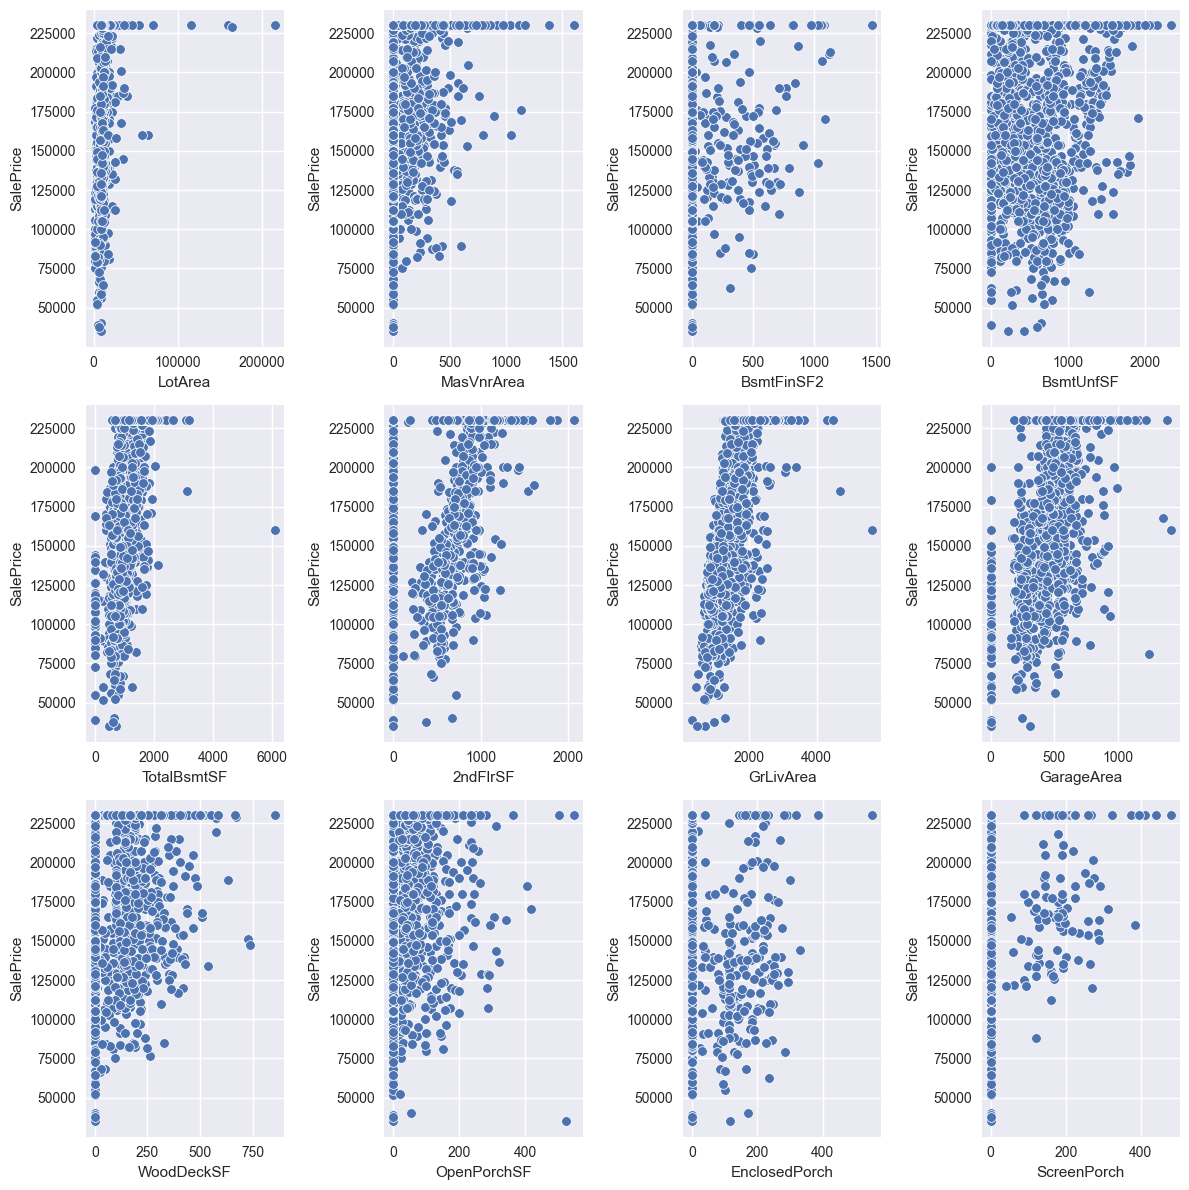

In [69]:
def replace_ouliers(df, percentile = 80):
    
    for col in df.columns:
        df_copy = df.copy()
        
        percentile_value = np.percentile(df_copy[col], percentile)

        df_copy[col] = np.where(df_copy[col] > percentile_value, percentile_value, df_copy[col])
       

    return df_copy

tem = replace_ouliers(temp_data)

fig, axes = plt.subplots( 3, 4, figsize = (12, 12))
for ax, cols in zip(axes.flat, num_num_wo_years.columns):
    temp = tem[[cols, 'SalePrice']]
    sns.scatterplot(x = temp[cols] , y = temp['SalePrice'],  ax = ax)
plt.tight_layout()

In [70]:
tem.drop('SalePrice', axis=1, inplace = True)
tem.head()

,LotArea,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,8450,196.0,0,150,856,854,1710,548,0,61,0,0
1,9600,0.0,0,284,1262,0,1262,460,298,0,0,0
2,11250,162.0,0,434,920,866,1786,608,0,42,0,0
3,9550,0.0,0,540,756,756,1717,642,0,35,272,0
4,14260,350.0,0,490,1145,1053,2198,836,192,84,0,0


In [71]:
df_diff = pd.concat([temp_data,tem]).drop_duplicates(keep=False)

In [73]:
df_diff.shape

(2907, 13)

In [51]:
tem.fillna(0, inplace = True)

In [80]:
from sklearn.linear_model import LinearRegression
X_train = tem
y_train = y

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [75]:
tem.columns

Index(['LotArea', 'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')

In [76]:
print(model.coef_)
print(model.intercept_)

[  0.166481    46.86949001 -21.76896978 -11.44409033  54.04084586
  10.42387146  53.6060674   87.61834919  54.03042072  45.43298579
 -62.08386145  44.06499562]
-8111.648708281427


In [77]:
num_num_wo_years.head()
num_num_wo_years.fillna(0, inplace = True)

In [78]:
X_train = num_num_wo_years
y_train = y

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [79]:
print(model.coef_)
print(model.intercept_)

[  0.166481    46.86949001 -21.76896978 -11.44409033  54.04084586
  10.42387146  53.6060674   87.61834919  54.03042072  45.43298579
 -62.08386145  44.06499562]
-8111.648708281427
